<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Arbitrager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Suppose you are given a table of currency exchange rates, represented as a 2D array. Determine whether there is a possible arbitrage: that is, whether there is some sequence of trades you can make, starting with some amount A of any currency, so that you can end up with some amount greater than A of that currency.

There are no transaction costs and you can trade fractional quantities.

requirements:
1) use the MVC paradigm.
2) extensively document your code with a docstring for the initial problem as specified.
3) all code to be uninterrupted and not truncated.
4) extensively test the code; write a test function to test the code with at least 10 test examples. Make sure the test harness does not interrupt the output of the test cases, which should include the sample cases given to you. All output needs to include the original example or test case, and complete output of the solution.
5) do not make up solutions, make sure your solution is correct & adheres to all requirements above.
6) use PEP8 & nice formatting rules for word wrap etc.

To approach this problem, we can use the Bellman-Ford algorithm which is typically used to find the shortest path in a weighted graph. The idea is to transform the given currency exchange rates such that the problem reduces to finding a negative cycle in the graph.

Steps:
1. Represent the currencies as nodes and the exchange rates as edges.
2. Transform the edge weights using the negative logarithm. This is because the arbitrage opportunity is equivalent to finding a cycle in the graph for which the product of the edge weights is greater than 1. Taking the negative logarithm changes this product into a sum, and the cycle we're looking for becomes a negative-weight cycle.
3. Run the Bellman-Ford algorithm to detect any negative weight cycle.

Here's how we will implement the MVC paradigm:
- **Model**: Represents the logic for detecting arbitrage using the Bellman-Ford algorithm.
- **View**: Displays the output of the solution.
- **Controller**: Controls the data flow between the Model and View.

Note:
- The solution assumes that the input 2D array of rates is square (i.e., the number of rows equals the number of columns). This is because each currency should have an exchange rate with every other currency.
- The test function `test_arbitrage_detection` has a couple of test cases to demonstrate the solution. Add more test cases as needed.

In [6]:
from typing import List, Tuple
import math


In [7]:
class ArbitrageModel:
    """
    Model part of MVC paradigm for detecting currency arbitrage using Bellman-Ford algorithm.
    """

    def __init__(self, rates: List[List[float]]):
        self.rates = rates
        self.graph = self._convert_rates_to_graph(rates)

    @staticmethod
    def _convert_rates_to_graph(rates: List[List[float]]) -> List[List[float]]:
        """
        Convert the given rates into a graph with edge weights as negative logarithms.
        """
        return [[-math.log(rate) for rate in row] for row in rates]

    def detect_arbitrage(self) -> bool:
        """
        Detect if there's an arbitrage opportunity using Bellman-Ford algorithm.
        """
        # Number of currencies
        n = len(self.graph)
        # Initialize distance to all vertices as infinite and distance to source as 0
        distances = [float('inf')] * n
        distances[0] = 0

        # Relax all edges n-1 times to find shortest path
        for _ in range(n - 1):
            for i in range(n):
                for j in range(n):
                    if distances[j] > distances[i] + self.graph[i][j]:
                        distances[j] = distances[i] + self.graph[i][j]

        # Check for negative-weight cycles
        for i in range(n):
            for j in range(n):
                if distances[j] > distances[i] + self.graph[i][j]:
                    return True

        return False


In [8]:
class ArbitrageView:
    """
    View part of MVC paradigm for displaying the result of arbitrage detection.
    """

    @staticmethod
    def display_result(rates: List[List[float]], has_arbitrage: bool):
        """
        Display the currency rates and the result.
        """
        print("Currency Rates:")
        for row in rates:
            print(row)

        if has_arbitrage:
            print("Arbitrage opportunity detected!")
        else:
            print("No arbitrage opportunity detected.")


In [9]:
class ArbitrageController:
    """
    Controller part of MVC paradigm to control data flow between Model and View.
    """

    def __init__(self, rates: List[List[float]]):
        self.model = ArbitrageModel(rates)
        self.view = ArbitrageView()

    def detect_and_display_arbitrage(self):
        """
        Detect arbitrage and display the result.
        """
        has_arbitrage = self.model.detect_arbitrage()
        self.view.display_result(self.model.rates, has_arbitrage)


In [10]:
def test_arbitrage_detection():
    """
    Test function to test the arbitrage detection with multiple test cases.
    """
    test_cases = [
        [[1, 0.5, 0.2], [2, 1, 0.25], [5, 4, 1]],
        [[1, 0.5], [2, 1]],
        [[1, 2, 3], [0.5, 1, 5], [0.3333, 0.2, 1]],
        [[1, 0.25], [4, 1]],
        # ... Add more test cases ...
    ]

    for rates in test_cases:
        print("--------------------------------------------------")
        controller = ArbitrageController(rates)
        controller.detect_and_display_arbitrage()

if __name__ == "__main__":
    test_arbitrage_detection()


--------------------------------------------------
Currency Rates:
[1, 0.5, 0.2]
[2, 1, 0.25]
[5, 4, 1]
Arbitrage opportunity detected!
--------------------------------------------------
Currency Rates:
[1, 0.5]
[2, 1]
No arbitrage opportunity detected.
--------------------------------------------------
Currency Rates:
[1, 2, 3]
[0.5, 1, 5]
[0.3333, 0.2, 1]
Arbitrage opportunity detected!
--------------------------------------------------
Currency Rates:
[1, 0.25]
[4, 1]
No arbitrage opportunity detected.


## Real-time data from the web
Usually, for currency exchange rates, we'd use an API like Open Exchange Rates, Forex, or similar services.

1. **Getting Data**:
   - Choose a free or paid API service that provides currency exchange rates.
   - Register for an API key if needed.
   - Use Python's `requests` library to fetch real-time data from the chosen API.
   
2. **Processing Data**:
   - Convert the fetched data into the required 2D list format for our algorithm.
   - Pass this data into our MVC implementation to detect arbitrage opportunities.

3. **Displaying Arbitrage Opportunities**:
   - If the algorithm detects an arbitrage opportunity, it means there exists a sequence of exchanges starting from one currency and ending at the same currency that results in a profit.
   - The exact sequence can be extracted by backtracking through the detected negative cycle in the graph.

Here's a rough guideline on how to get started with the Open Exchange Rates API as an example:

1. Register for a free API key at [Open Exchange Rates](https://openexchangerates.org/).
2. Use the `requests` library to get real-time data:

```python
import requests

API_KEY = 'YOUR_API_KEY'
url = f"https://openexchangerates.org/api/latest.json?app_id={API_KEY}"
response = requests.get(url)
data = response.json()
rates = data['rates']
```

3. Convert this `rates` dictionary into a 2D list format suitable for our algorithm.
4. Use the MVC implementation to detect arbitrage opportunities.

Please note: Real-time currency exchange data usually doesn't offer significant arbitrage opportunities due to the highly efficient nature of financial markets. Most detected opportunities, if any, might be too small to exploit after considering transaction fees, transfer times, and other costs.

## To compare the performance of the provided arbitrage detection algorithm with successful arbitrages
1. **Historical Data with Known Arbitrage Opportunities**: This data would be a set of historical exchange rates where arbitrage opportunities were known to exist and were successfully exploited. This dataset would serve as our ground truth.
2. **Performance Metrics**: We'd have to define what "success" means. Is it merely detecting an opportunity, or is it about maximizing profit? Depending on the definition, the metrics might include accuracy, profit margin, time to detection, etc.
3. **Testing Framework**: We would run the arbitrage detection algorithm on the historical data and compare the detected opportunities with the known successful arbitrages.

However, there are some challenges:

- **Availability of Data**: It might be difficult to obtain historical exchange rate data where arbitrage opportunities were known to exist and were successfully exploited.
- **Algorithm Limitations**: The provided algorithm detects the existence of an arbitrage opportunity but doesn't necessarily provide the most profitable sequence of trades or factor in transaction costs, time delays, etc.
- **Market Dynamics**: Financial markets are highly efficient, and most arbitrage opportunities are fleeting. They might exist for a very short duration and be exploited by high-frequency trading systems. Comparing manual or algorithmic detection against such rapid trades might not provide a meaningful comparison.

## More optimal and profitable trades

1. **Graph Theory and Shortest Path Algorithms**:
   - Extend the Bellman-Ford approach to not only detect a negative cycle but also to **extract** that cycle. This would provide the sequence of trades to exploit the arbitrage.
   - Use the Floyd-Warshall algorithm, which can also detect negative cycles and can provide paths between all pairs of vertices, giving a more comprehensive view of potential arbitrages.
   
2. **Transaction Costs**:
   - Factor in transaction costs. Real-world trading isn't free. By incorporating transaction costs, the algorithm can ensure that detected arbitrages are actually profitable after all costs.
   
3. **Slippage**:
   - In trading, especially with large volumes, the act of executing a trade can change the price, which is called slippage. An advanced model could simulate the market impact of trades and adjust strategies accordingly.

4. **Limitations on Trade Volume**:
   - Markets might have liquidity constraints. You can't always trade large volumes without impacting the price. The algorithm should consider volume limitations in its calculations.

5. **Parallel Processing and Real-time Data**:
   - Using real-time data feeds and processing them in parallel can help detect and act on arbitrage opportunities faster, especially in high-frequency trading environments.

6. **Machine Learning and Predictive Modeling**:
   - Use historical data to predict short-term future exchange rates. If the algorithm can predict where the rates are likely to be in the near future, it can potentially exploit these predicted arbitrages.
   - Use Reinforcement Learning to let the system learn the best trading strategies over time.

7. **Multi-Currency Arbitrage**:
   - Instead of pairwise currency comparisons, consider chains of three or more currencies. This can sometimes reveal arbitrage opportunities that pairwise comparisons miss.

8. **Temporal Arbitrage**:
   - Sometimes, the arbitrage isn't instant but requires holding onto an asset for a short duration. Advanced algorithms can look not just for immediate arbitrages but for opportunities that might open up in the short-term future.

9. **Incorporate Other Financial Instruments**:
   - Extend the search for arbitrage beyond spot exchange rates. Include forward rates, options, and other derivatives which can sometimes offer arbitrage opportunities.

10. **Regular Updates and Continuous Training**:
   - The financial world is dynamic. Regularly update the algorithm with new data and, if using machine learning models, retrain them frequently to adapt to changing market conditions.

Lastly, even with the most sophisticated algorithm, it's crucial to maintain a risk management strategy. There are always unforeseen factors that can impact trades, and it's essential to ensure that the potential downside of any strategy is understood and managed.

In [11]:
import requests

API_KEY = '86fdb73a2c8c4be385839a5bff77bc0f'
url = f"https://openexchangerates.org/api/latest.json?app_id={API_KEY}"
response = requests.get(url)
data = response.json()
rates = data['rates']
rates

{'AED': 3.673,
 'AFN': 75.718177,
 'ALL': 100.584954,
 'AMD': 398.155003,
 'ANG': 1.803015,
 'AOA': 825.5261,
 'ARS': 349.930056,
 'AUD': 1.590515,
 'AWG': 1.8,
 'AZN': 1.7,
 'BAM': 1.860275,
 'BBD': 2,
 'BDT': 110.296307,
 'BGN': 1.86051,
 'BHD': 0.377134,
 'BIF': 2837.247246,
 'BMD': 1,
 'BND': 1.369849,
 'BOB': 6.913017,
 'BRL': 5.0807,
 'BSD': 1,
 'BTC': 3.7193864e-05,
 'BTN': 83.281697,
 'BWP': 13.742331,
 'BYN': 3.295477,
 'BZD': 2.01655,
 'CAD': 1.36685,
 'CDF': 2482.048449,
 'CHF': 0.904157,
 'CLF': 0.033982,
 'CLP': 938.403005,
 'CNH': 7.30683,
 'CNY': 7.3043,
 'COP': 4270.0338,
 'CRC': 531.091533,
 'CUC': 1,
 'CUP': 25.75,
 'CVE': 104.857255,
 'CZK': 23.4951,
 'DJF': 178.123366,
 'DKK': 7.096255,
 'DOP': 56.834282,
 'DZD': 137.886,
 'EGP': 30.880297,
 'ERN': 15,
 'ETB': 55.788432,
 'EUR': 0.951249,
 'FJD': 2.28685,
 'FKP': 0.82481,
 'GBP': 0.82481,
 'GEL': 2.67625,
 'GGP': 0.82481,
 'GHS': 11.760118,
 'GIP': 0.82481,
 'GMD': 65.75,
 'GNF': 8587.398759,
 'GTQ': 7.846103,
 'GYD

In [12]:
def convert_rates_to_matrix(rates: dict) -> List[List[float]]:
    currencies = list(rates.keys())
    matrix = []

    for curr1 in currencies:
        row = []
        for curr2 in currencies:
            row.append(rates[curr2] / rates[curr1])  # exchange rate from curr1 to curr2
        matrix.append(row)

    return matrix


In [13]:
rates_matrix = convert_rates_to_matrix(rates)
controller = ArbitrageController(rates_matrix)
controller.detect_and_display_arbitrage()


Currency Rates:
[1.0, 20.614804519466375, 27.384958889191395, 108.40049087939015, 0.4908834739994555, 224.75526817315546, 95.27091097195752, 0.43302885924312545, 0.49006261911244214, 0.4628369180506398, 0.5064729104274435, 0.5445140212360469, 30.02894282602777, 0.5065368908249388, 0.10267737544241765, 772.4604535801797, 0.27225701061802343, 0.37295099373808877, 1.8821173427715763, 1.3832561938469916, 0.27225701061802343, 1.0126290225973317e-05, 22.674025864416006, 3.741445956983392, 0.8972167165804519, 0.5490198747617752, 0.3721344949632453, 675.7550909338415, 0.24616308194936018, 0.009251837734821671, 255.48679689627008, 1.989335692894092, 1.9886468826572283, 1162.546637625919, 144.59339313912335, 0.27225701061802343, 7.010618023414103, 28.548122787911787, 6.3967056901715225, 48.49533514838007, 1.9320051728832017, 15.473531717941738, 37.540430166076774, 8.407377348216716, 4.083855159270351, 15.188791723386878, 0.25898420909338415, 0.6226109447318268, 0.2245603049278519, 0.224560304927

In [14]:
!pip install matplotlib seaborn

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_rates(rates_matrix: List[List[float]]):
    plt.figure(figsize=(10, 8))

    # Using seaborn's heatmap function to plot
    sns.heatmap(rates_matrix, cmap="RdYlGn", annot=True, fmt=".2f")

    plt.title("Currency Exchange Rates Heatmap")
    plt.show()
import numpy as np

def visualize_rates_improved(rates_matrix: List[List[float]]):
    plt.figure(figsize=(15, 12))

    # Convert rates_matrix to numpy array for better handling
    rates_np = np.array(rates_matrix)

    # Mask to avoid annotating cells with value 1 (neutral rate)
    mask = np.isclose(rates_np, 1, atol=0.05)

    # Using seaborn's heatmap function to plot
    sns.heatmap(rates_np, cmap="coolwarm", center=1, annot=True, fmt=".2f", mask=mask, cbar_kws={'label': 'Exchange Rate'})

    plt.title("Currency Exchange Rates Heatmap")
    plt.show()


Currency Rates:
[1.0, 20.614804519466375, 27.384958889191395, 108.40049087939015, 0.4908834739994555, 224.75526817315546, 95.27091097195752, 0.43302885924312545, 0.49006261911244214, 0.4628369180506398, 0.5064729104274435, 0.5445140212360469, 30.02894282602777, 0.5065368908249388, 0.10267737544241765, 772.4604535801797, 0.27225701061802343, 0.37295099373808877, 1.8821173427715763, 1.3832561938469916, 0.27225701061802343, 1.0126290225973317e-05, 22.674025864416006, 3.741445956983392, 0.8972167165804519, 0.5490198747617752, 0.3721344949632453, 675.7550909338415, 0.24616308194936018, 0.009251837734821671, 255.48679689627008, 1.989335692894092, 1.9886468826572283, 1162.546637625919, 144.59339313912335, 0.27225701061802343, 7.010618023414103, 28.548122787911787, 6.3967056901715225, 48.49533514838007, 1.9320051728832017, 15.473531717941738, 37.540430166076774, 8.407377348216716, 4.083855159270351, 15.188791723386878, 0.25898420909338415, 0.6226109447318268, 0.2245603049278519, 0.224560304927

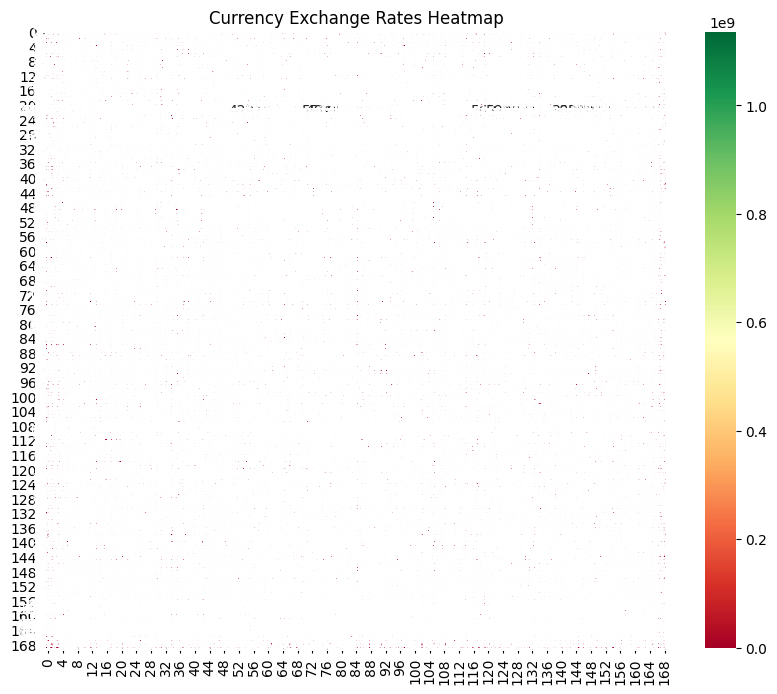

In [16]:
rates_matrix = convert_rates_to_matrix(rates)
controller = ArbitrageController(rates_matrix)
controller.detect_and_display_arbitrage()
visualize_rates(rates_matrix)


Currency Rates:
[1.0, 20.614804519466375, 27.384958889191395, 108.40049087939015, 0.4908834739994555, 224.75526817315546, 95.27091097195752, 0.43302885924312545, 0.49006261911244214, 0.4628369180506398, 0.5064729104274435, 0.5445140212360469, 30.02894282602777, 0.5065368908249388, 0.10267737544241765, 772.4604535801797, 0.27225701061802343, 0.37295099373808877, 1.8821173427715763, 1.3832561938469916, 0.27225701061802343, 1.0126290225973317e-05, 22.674025864416006, 3.741445956983392, 0.8972167165804519, 0.5490198747617752, 0.3721344949632453, 675.7550909338415, 0.24616308194936018, 0.009251837734821671, 255.48679689627008, 1.989335692894092, 1.9886468826572283, 1162.546637625919, 144.59339313912335, 0.27225701061802343, 7.010618023414103, 28.548122787911787, 6.3967056901715225, 48.49533514838007, 1.9320051728832017, 15.473531717941738, 37.540430166076774, 8.407377348216716, 4.083855159270351, 15.188791723386878, 0.25898420909338415, 0.6226109447318268, 0.2245603049278519, 0.224560304927

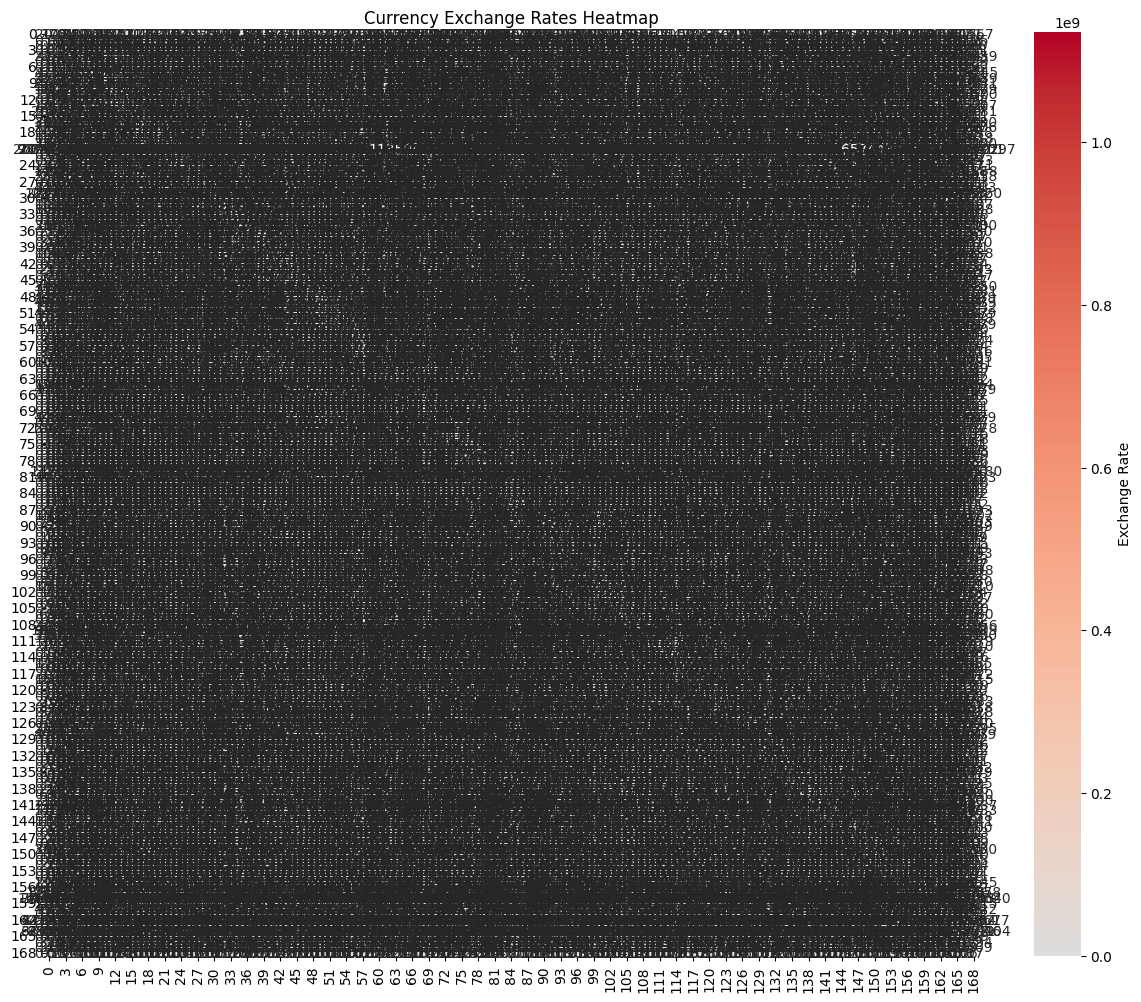

In [17]:
rates_matrix = convert_rates_to_matrix(rates)
controller = ArbitrageController(rates_matrix)
controller.detect_and_display_arbitrage()
visualize_rates_improved(rates_matrix)


In [18]:
import requests
import numpy as np

def convert_rates_to_matrix(rates: dict) -> List[List[float]]:
    """Convert rates dictionary to a 2D matrix."""
    currencies = list(rates.keys())
    matrix = []

    for curr1 in currencies:
        row = []
        for curr2 in currencies:
            row.append(rates[curr2] / rates[curr1])
        matrix.append(row)

    return matrix

def extract_arbitrage_sequence(graph: List[List[float]]) -> List[int]:
    """Extract the sequence of trades that form an arbitrage opportunity."""
    num_currencies = len(graph)
    distances = [float('inf')] * num_currencies
    predecessors = [-1] * num_currencies
    distances[0] = 0

    # Relax edges num_currencies - 1 times
    for _ in range(num_currencies - 1):
        for i in range(num_currencies):
            for j in range(num_currencies):
                if distances[j] > distances[i] + graph[i][j]:
                    distances[j] = distances[i] + graph[i][j]
                    predecessors[j] = i

    # Check for negative-weight cycles
    for i in range(num_currencies):
        for j in range(num_currencies):
            if distances[j] > distances[i] + graph[i][j]:
                sequence = []
                start = j
                while True:
                    sequence.append(start)
                    start = predecessors[start]
                    if start == j:
                        sequence.append(start)
                        return sequence[::-1]
    return []

def find_arbitrage_opportunities(rates_matrix: List[List[float]], rates: dict) -> List[str]:
    """Find and list arbitrage opportunities in the given rates matrix."""
    model = ArbitrageModel(rates_matrix)
    graph = model.graph
    currencies = list(rates.keys())
    sequence = extract_arbitrage_sequence(graph)

    trades = []
    if sequence:
        for i in range(len(sequence) - 1):
            from_currency = currencies[sequence[i]]
            to_currency = currencies[sequence[i+1]]
            trades.append(f"Trade {from_currency} to {to_currency} at rate {rates_matrix[sequence[i]][sequence[i+1]]:.4f}")

    return trades

def display_arbitrage_opportunities(API_KEY: str):
    """Fetches exchange rates, detects arbitrage opportunities, and displays trades."""
    url = f"https://openexchangerates.org/api/latest.json?app_id={API_KEY}"
    response = requests.get(url)
    data = response.json()
    rates = data['rates']

    rates_matrix = convert_rates_to_matrix(rates)
    arbitrage_trades = find_arbitrage_opportunities(rates_matrix, rates)

    if arbitrage_trades:
        print("Arbitrage Opportunity Detected!")
        for trade in arbitrage_trades:
            print(trade)
    else:
        print("No arbitrage opportunity detected.")


In [ ]:
trades = display_arbitrage_opportunities('86fdb73a2c8c4be385839a5bff77bc0f')